In [1]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
plt.rcParams['font.family'] = 'sans-serif'

Loading data into 'data'

In [3]:
data= pd.read_excel(r'C:\Users\AD15855\OneDrive - Lumen\Desktop\DS Related\DSA\DSA TCS ion\dataset.xlsx')

Analysing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362757 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Patient Name   362806 non-null  object
 13  Race           362806 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [5]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Patient Name', 'Race'],
      dtype='object')

In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          49
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Patient Name      0
Race              0
dtype: int64

In [8]:
# Handling instances with whitespaces
for i in data:
    data[i]=np.where(data[i]==" ",np.NAN,data[i])
    
data.isna().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41873
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
Patient Name         0
Race                 0
dtype: int64

In [9]:
data.dropna(axis=0, inplace = True)
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Patient Name     0
Race             0
dtype: int64

In [10]:
# Handling instances with double whitespaces
for i in data:
    data[i]=np.where(data[i]=="  ",np.NAN,data[i])
    
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Patient Name     0
Race             0
dtype: int64

Only review have null values

In [11]:
data.Sex.value_counts()

Female    202976
Male       77141
Name: Sex, dtype: int64

In [12]:
data.Age.value_counts()

45-54                  64122
55-64                  57464
35-44                  45467
25-34                  42799
65-74                  29982
19-24                  21232
75 or over             10727
13-18                   5974
2023-12-07 00:00:00     1334
2023-06-03 00:00:00      623
0-2                      393
Name: Age, dtype: int64

In [13]:
data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
data['Month'] = pd.to_datetime(data['Date'], errors='coerce').dt.month
data['day_of_week'] = pd.to_datetime(data['Date'], errors='coerce').dt.day_name()

3.3328297402485516

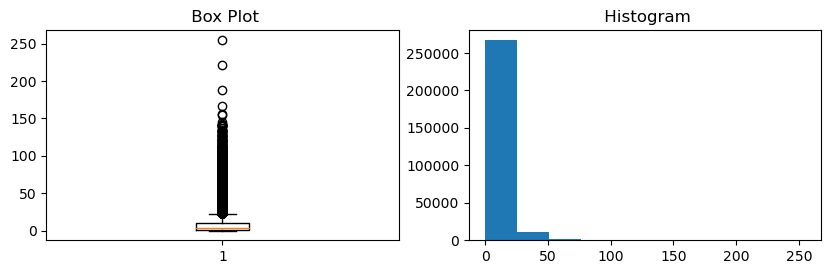

In [14]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data["UsefulCount"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data["UsefulCount"])
plt.title(" Histogram")
data.UsefulCount.skew()

0.370753160563002

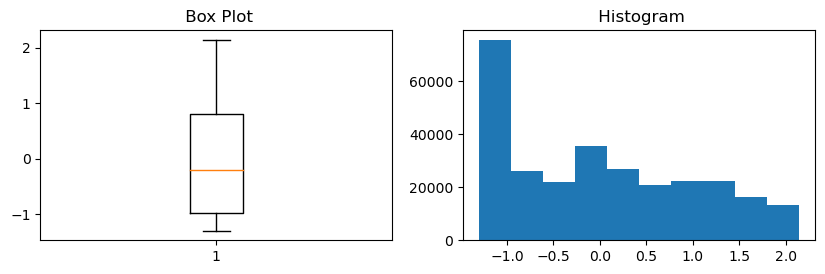

In [15]:
data_Usefulcount = pd.DataFrame(data['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")

data['UsefulCount_boxcox'] = data_Usefulcount1
data['UsefulCount_boxcox'].skew()

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         5.0
1         5.0
6         5.0
7         5.0
9         4.0
         ... 
362799    2.0
362801    5.0
362803    2.0
362804    5.0
362805    4.0
Name: EaseofUse, Length: 280117, dtype: float64>

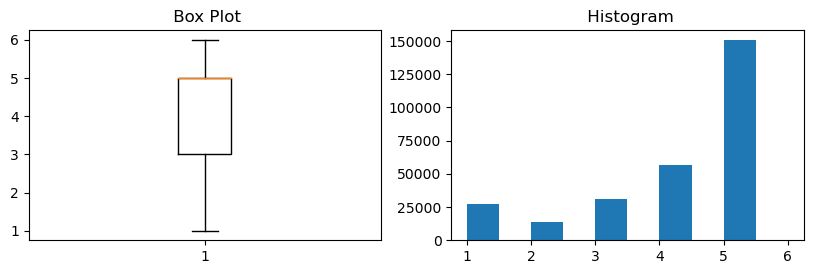

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data["EaseofUse"])
plt.title(" Histogram")
data.EaseofUse.skew

-0.568068746106967

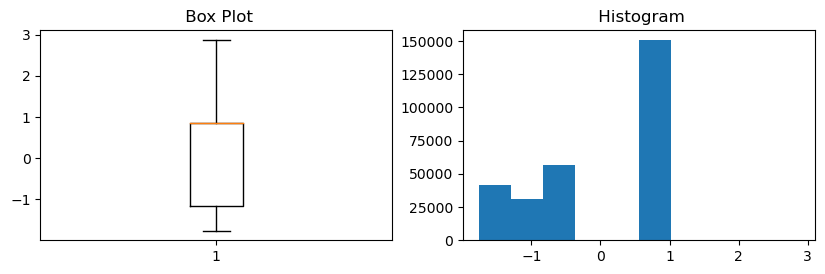

In [17]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(data['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title(" Histogram")

data['EaseofUse_boxcox'] = data_EaseofUse1
data.EaseofUse_boxcox.skew()

Effectiveness

-0.5892830024617304

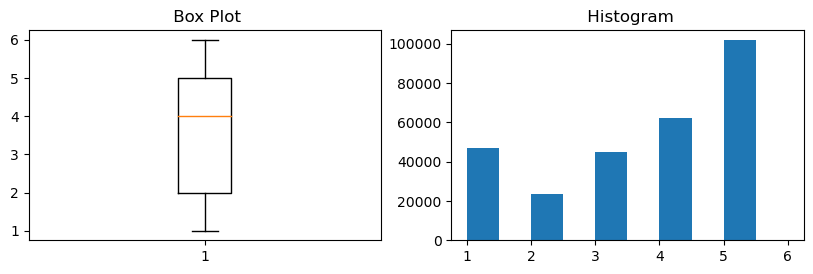

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data["Effectiveness"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data["Effectiveness"])
plt.title(" Histogram")
data.Effectiveness.skew()

New Feature creation: Sideeffect

In [19]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data['Sideeffect'] = data['Satisfaction'].map(mapping)


In [20]:
data.dropna(axis=0, inplace = True)
data.isna().sum()

Age                   0
Condition             0
Date                  0
Drug                  0
DrugId                0
EaseofUse             0
Effectiveness         0
Reviews               0
Satisfaction          0
Sex                   0
Sides                 0
UsefulCount           0
Patient Name          0
Race                  0
Year                  0
Month                 0
day_of_week           0
UsefulCount_boxcox    0
EaseofUse_boxcox      0
Sideeffect            0
dtype: int64

In [21]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Patient Name', 'Race', 'Year', 'Month', 'day_of_week',
       'UsefulCount_boxcox', 'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

Exploratory Data Analysis

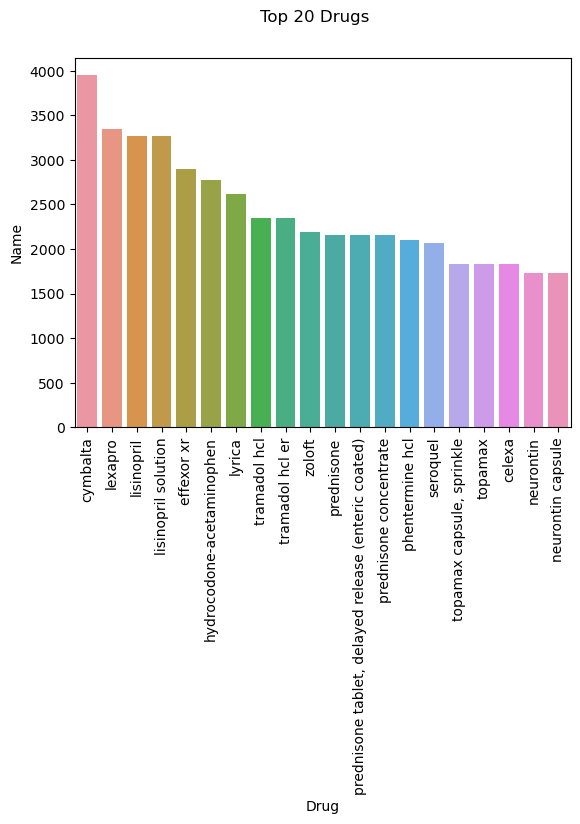

In [22]:
data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people

Text(0, 0.5, 'Users')

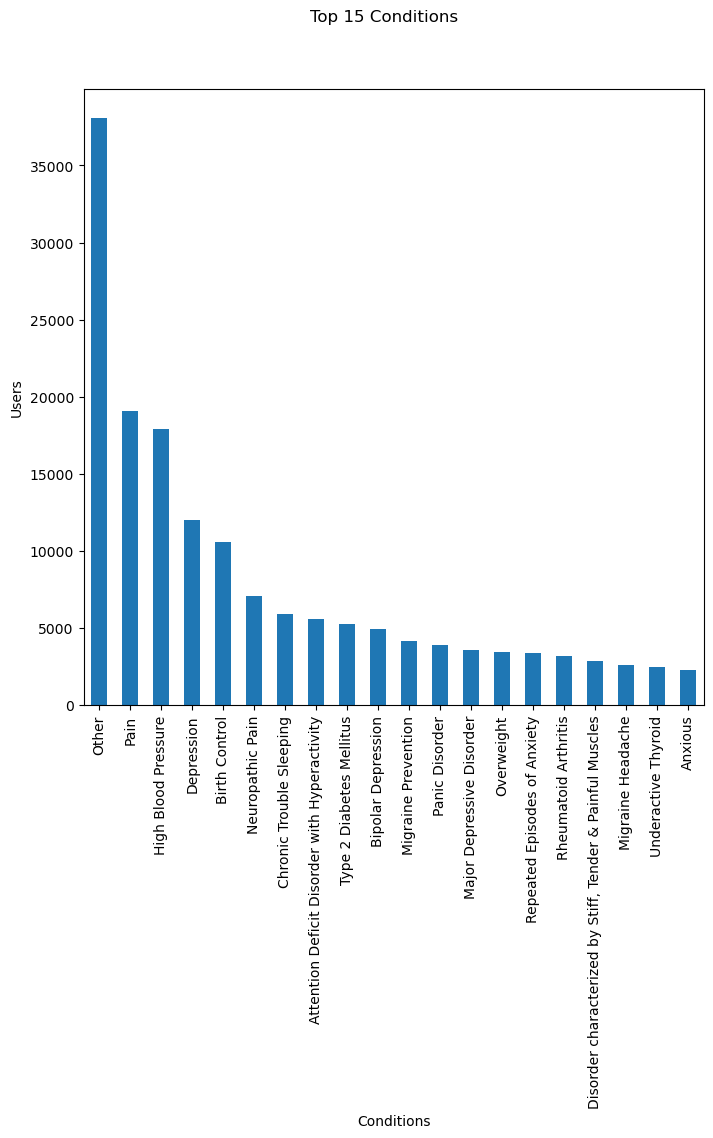

In [23]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

Which Gender is the predominant user

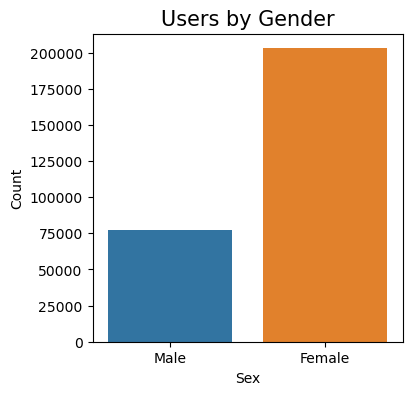

In [24]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Thus we conclude that its Female

Which Race is the predominant user

Text(0, 0.5, 'Count')

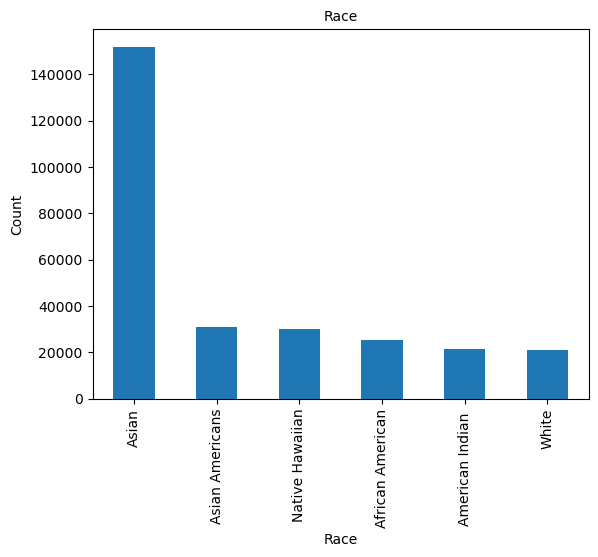

In [25]:
data['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

We saw that its Asians

Text(0.5, 1.0, 'Users by Race and Gender')

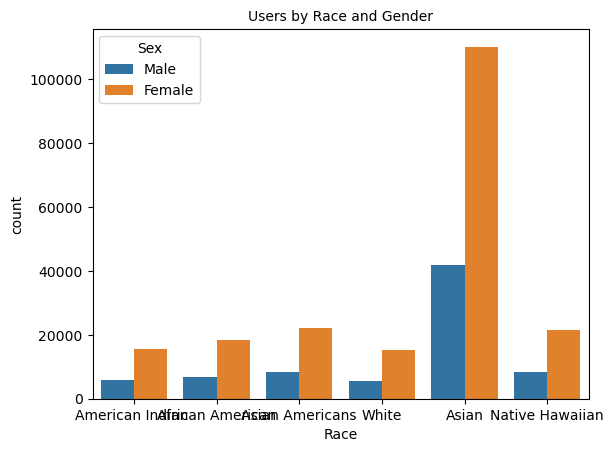

In [26]:
sns.countplot(x='Race',hue='Sex',data=data)
plt.title("Users by Race and Gender", fontsize = 10)

 each year, how many reviews were collected

Text(0, 0.5, 'Count of Reviews')

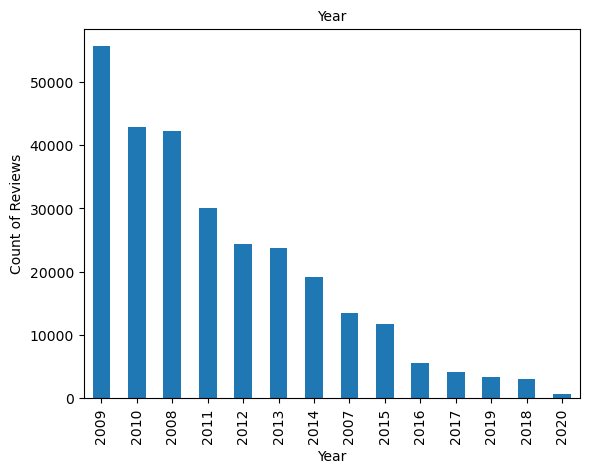

In [27]:
data['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

How effective is the drug

Text(0, 0.5, 'Count')

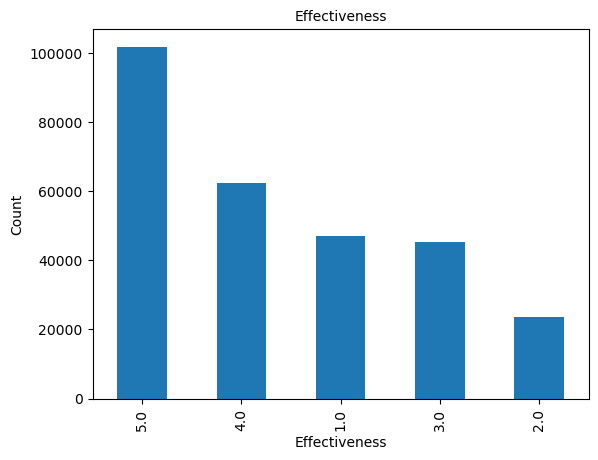

In [28]:
data['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

how is the sideeffects of the drug in Gender

<Figure size 2000x1000 with 0 Axes>

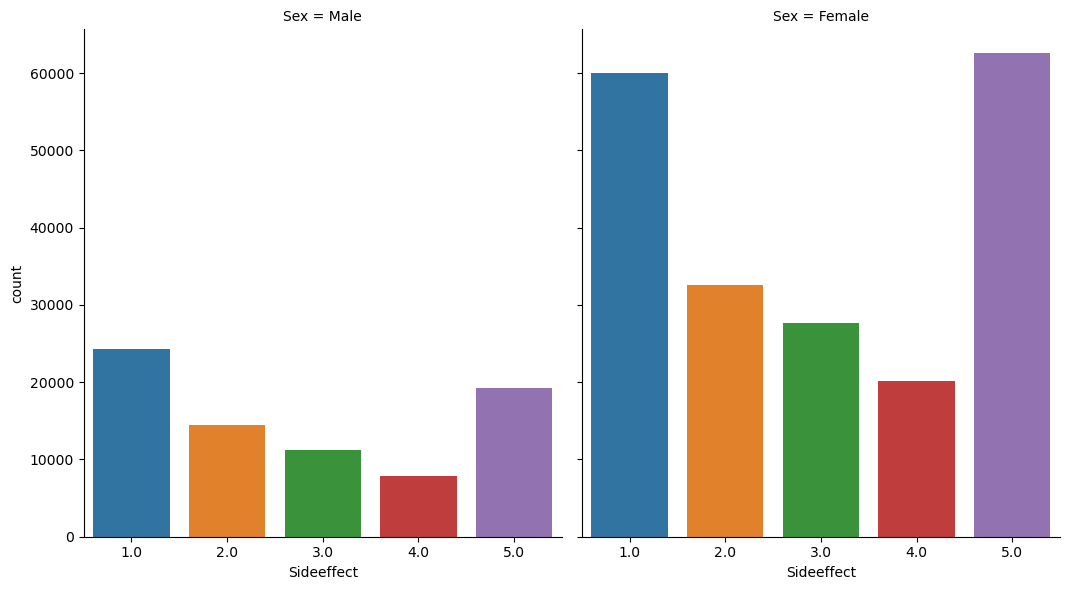

In [29]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="Sideeffect",col="Sex",data=data, kind="count",height=6,aspect =.9);

Female users have reported more extreme side effects

which race has reported extreme side effects?

<Axes: xlabel='Race', ylabel='count'>

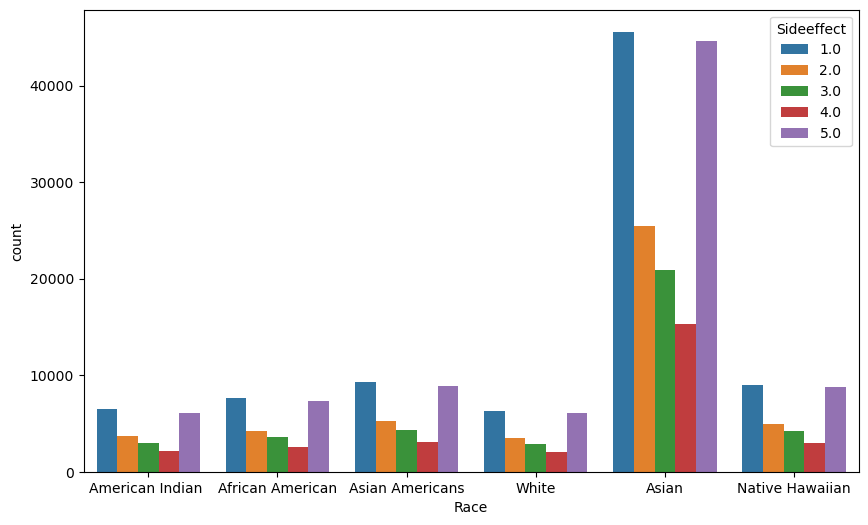

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffect',data=data)

Asian Patients   reported more extreme side effects

We can drop review coloumn as we dont deal with NLP

In [31]:
data = data.drop(['Reviews'],axis=1) #dropping tags and description coloumn

In [32]:
data

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Patient Name,Race,Year,Month,day_of_week,UsefulCount_boxcox,EaseofUse_boxcox,Sideeffect
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0,Miles Chavez,American Indian,2014,9,Sunday,-1.300296,0.856565,1.0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0,Aaron Bailey,African American,2011,1,Thursday,-0.986198,0.856565,1.0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180.0,5.0,5.0,2.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,Isaiah Brown,Asian Americans,2017,6,Thursday,-1.300296,0.856565,4.0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180.0,5.0,5.0,5.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,Micah Robinson,American Indian,2017,1,Monday,-1.300296,0.856565,1.0
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800.0,4.0,2.0,2.0,Male,"Temporary burning, stinging, dryness in the no...",0.0,Walker Nguyen,White,2012,10,Monday,-1.300296,-0.405726,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362799,25-34,Stop Smoking,11/16/2008,chantix,144470.0,2.0,4.0,4.0,Female,"Nausea , headache , vomiting , drowsiness, g...",5.0,James Fraser,Asian,2008,11,Sunday,0.000753,-1.557238,2.0
362801,55-64,Stop Smoking,11/14/2008,chantix,144470.0,5.0,5.0,5.0,Female,"Nausea , headache , vomiting , drowsiness, g...",2.0,Elijah Reid,Asian,2008,11,Friday,-0.701810,0.856565,1.0
362803,25-34,Stop Smoking,11/13/2008,chantix,144470.0,2.0,4.0,2.0,Female,"Nausea , headache , vomiting , drowsiness, g...",3.0,Elliot Duncan,Asian,2008,11,Thursday,-0.444221,-1.557238,4.0
362804,55-64,Stop Smoking,11/13/2008,chantix,144470.0,5.0,5.0,5.0,Male,"Nausea , headache , vomiting , drowsiness, g...",1.0,Gabriel Cameron,Asian,2008,11,Thursday,-0.986198,0.856565,1.0


Columns Name has unique values shall  be dropped. Date, Easeofuse, usefulcount,Drug, DrugId, Condition,  sides, Year will be dropped. Race, Sex, Year, Month, Dayofweek will be onehot encoded. Satisfaction will be segregated based on the values as nil, mild, moderate, sever, extreme based on values of 5, 4, 3, 2, 1 respectively. The assumption being that thet satisfaction is a parameter that gets affected by side effects in case of patients

In [33]:
data.drop(['Patient Name','Condition','Date','Drug','DrugId','EaseofUse','Sides','UsefulCount'], axis=1, inplace = True)

In [34]:
data.Month = data.Month.astype(str)
data.Year = data.Year.astype(str)
data_encod = data[['Race', 'Age','Sex','Month','day_of_week']]
data_num = data[['Effectiveness']]
data.columns

Index(['Age', 'Effectiveness', 'Satisfaction', 'Sex', 'Race', 'Year', 'Month',
       'day_of_week', 'UsefulCount_boxcox', 'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

Encoding : One Hot Encoding

In [35]:
data_encod = pd.get_dummies(data_encod)
data_encod

,Race_African American,Race_American Indian,Race_Asian,Race_Asian Americans,Race_Native Hawaiian,Race_White,Age_2023-06-03 00:00:00,Age_2023-12-07 00:00:00,Age_0-2,Age_13-18,...,Month_7,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362799,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
362801,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
362803,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
362804,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Scaling : Standard Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
data_num = mm.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns = ['Effectiveness'])
data_num

,Effectiveness
0,1.002377
1,1.002377
2,1.002377
3,1.002377
4,-1.041182
...,...
280106,0.321191
280107,1.002377
280108,0.321191
280109,1.002377


In [37]:
data3 = data_encod
data3['Effectiveness'] = data_num.values
data3

,Race_African American,Race_American Indian,Race_Asian,Race_Asian Americans,Race_Native Hawaiian,Race_White,Age_2023-06-03 00:00:00,Age_2023-12-07 00:00:00,Age_0-2,Age_13-18,...,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1.002377
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.002377
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.002377
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.002377
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-1.041182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362799,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.321191
362801,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.002377
362803,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.321191
362804,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.002377


So  what I suppose is the following features which are race, age and effectiveness can form the dataset which will predict the sideeffect of the user.

In [40]:
data4 = pd.DataFrame(data['Sideeffect'])
data4

,Sideeffect
0,1.0
1,1.0
6,4.0
7,1.0
9,4.0
...,...
362799,2.0
362801,1.0
362803,4.0
362804,1.0


Hence data3 froms our final dataset and data4 forms target

In [41]:
data3.isna().sum()

Race_African American      0
Race_American Indian       0
Race_Asian                 0
Race_Asian Americans       0
Race_Native Hawaiian       0
Race_White                 0
Age_2023-06-03 00:00:00    0
Age_2023-12-07 00:00:00    0
Age_0-2                    0
Age_13-18                  0
Age_19-24                  0
Age_25-34                  0
Age_35-44                  0
Age_45-54                  0
Age_55-64                  0
Age_65-74                  0
Age_75 or over             0
Sex_Female                 0
Sex_Male                   0
Month_1                    0
Month_10                   0
Month_11                   0
Month_12                   0
Month_2                    0
Month_3                    0
Month_4                    0
Month_5                    0
Month_6                    0
Month_7                    0
Month_8                    0
Month_9                    0
day_of_week_Friday         0
day_of_week_Monday         0
day_of_week_Saturday       0
day_of_week_Su

In [42]:
data4.isna().sum()

Sideeffect    0
dtype: int64

In [ ]:
#data4.dropna(axis=0, inplace = True)
#data4.isna().sum()

Now we have to split and train data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data3,data4,test_size=0.25, random_state = 42, stratify=data4)

Log Regression

In [44]:
#log regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# solver='lbfgs',max_iter=10000
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print(confusion_matrix(Y_test,Y_pred_logreg))
print(accuracy_score(Y_test,Y_pred_logreg))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_logreg)
print(report)

C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in la

[[18389  2399     9     0   276]
 [ 3175  7448    50     0  1086]
 [ 1633  2836   139     0  5129]
 [  771  1293    71     0  4874]
 [ 1388  1678    72     0 17312]]
0.6181527389044382
              precision    recall  f1-score   support

         1.0       0.73      0.87      0.79     21073
         2.0       0.48      0.63      0.54     11759
         3.0       0.41      0.01      0.03      9737
         4.0       0.00      0.00      0.00      7009
         5.0       0.60      0.85      0.70     20450

    accuracy                           0.62     70028
   macro avg       0.44      0.47      0.41     70028
weighted avg       0.53      0.62      0.54     70028



C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when

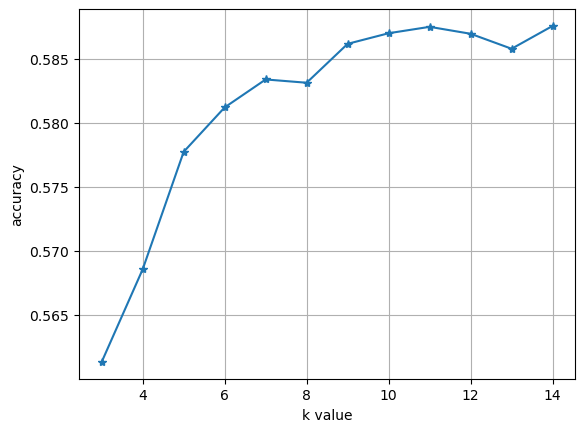

In [45]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(X_train, Y_train)
        Y_pred_knn = model2.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred_knn)
        metric_k.append(acc)
        
plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [46]:
knn = KNeighborsClassifier(n_neighbors=11)
model2 = knn.fit(X_train, Y_train)
Y_pred_knn = model2.predict(X_test)
# metrics
print(confusion_matrix(Y_test,Y_pred_knn))
print(accuracy_score(Y_test,Y_pred_knn))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_knn)
print(report)

C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[18396  1977   390    70   240]
 [ 5100  5016  1011   217   415]
 [ 2777  2392  2681   619  1268]
 [ 1326  1164  1473   797  2249]
 [ 2043  1512  1756   886 14253]]
0.5875221340035415
              precision    recall  f1-score   support

         1.0       0.62      0.87      0.73     21073
         2.0       0.42      0.43      0.42     11759
         3.0       0.37      0.28      0.31      9737
         4.0       0.31      0.11      0.17      7009
         5.0       0.77      0.70      0.73     20450

    accuracy                           0.59     70028
   macro avg       0.50      0.48      0.47     70028
weighted avg       0.56      0.59      0.56     70028



In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, Y_train)
y_pred_dtm = dtm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_dtm))
print(accuracy_score(Y_test, y_pred_dtm))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_dtm)
print(report)

[[18288  2064   425    87   209]
 [ 3764  6210  1171   264   350]
 [ 1890  2531  3478   807  1031]
 [  908  1147  1828  1305  1821]
 [ 1549  1546  2117  1466 13772]]
0.6147969383675101
              precision    recall  f1-score   support

         1.0       0.69      0.87      0.77     21073
         2.0       0.46      0.53      0.49     11759
         3.0       0.39      0.36      0.37      9737
         4.0       0.33      0.19      0.24      7009
         5.0       0.80      0.67      0.73     20450

    accuracy                           0.61     70028
   macro avg       0.53      0.52      0.52     70028
weighted avg       0.61      0.61      0.60     70028



In [48]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)

C:\Windows\Temp\ipykernel_22424\2820887269.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfm_clf.fit(X_train, Y_train)


[[18041  2125   480   125   302]
 [ 3463  6152  1294   325   525]
 [ 1736  2432  3317   875  1377]
 [  838  1084  1642  1243  2202]
 [ 1447  1468  1899  1268 14368]]
0.6157679785228766
              precision    recall  f1-score   support

         1.0       0.71      0.86      0.77     21073
         2.0       0.46      0.52      0.49     11759
         3.0       0.38      0.34      0.36      9737
         4.0       0.32      0.18      0.23      7009
         5.0       0.77      0.70      0.73     20450

    accuracy                           0.62     70028
   macro avg       0.53      0.52      0.52     70028
weighted avg       0.60      0.62      0.60     70028



Bagging Classifier

In [52]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, Y_train)
y_pred_bag = bag_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_bag))
print(accuracy_score(Y_test, y_pred_bag))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_bag)
print(report)

C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[17971  2119   528   139   316]
 [ 3483  6029  1332   337   578]
 [ 1772  2411  3231   893  1430]
 [  849  1052  1651  1285  2172]
 [ 1450  1445  1887  1332 14336]]
0.6119266579082653
              precision    recall  f1-score   support

         1.0       0.70      0.85      0.77     21073
         2.0       0.46      0.51      0.49     11759
         3.0       0.37      0.33      0.35      9737
         4.0       0.32      0.18      0.23      7009
         5.0       0.76      0.70      0.73     20450

    accuracy                           0.61     70028
   macro avg       0.52      0.52      0.51     70028
weighted avg       0.60      0.61      0.60     70028



In [53]:
from sklearn.ensemble import GradientBoostingClassifier
grd_clf = GradientBoostingClassifier()
grd_clf.fit(X_train, Y_train)
y_pred_grd = grd_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_grd))
print(accuracy_score(Y_test, y_pred_grd))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_grd)
print(report)

C:\Users\AD15855\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[18389  2401   209     0    74]
 [ 3173  7460  1034     0    92]
 [ 1633  2837  4641     6   620]
 [  771  1295  2494    23  2426]
 [ 1388  1686  2795     3 14578]]
0.6438995830239332
              precision    recall  f1-score   support

         1.0       0.73      0.87      0.79     21073
         2.0       0.48      0.63      0.54     11759
         3.0       0.42      0.48      0.44      9737
         4.0       0.72      0.00      0.01      7009
         5.0       0.82      0.71      0.76     20450

    accuracy                           0.64     70028
   macro avg       0.63      0.54      0.51     70028
weighted avg       0.67      0.64      0.61     70028

